Problem Statement: The goal of this analysis is to investigate the impact of socioeconomic status, particularly educational status and income bracket, on the obesity rate among adults in the United States. The dataset is sourced from the Behavioral Risk Factor Surveillance System, contains information on adults diet, physical activity, and weight status. This analysis involves comparing obesity rates across states and performing linear regression analyses to explore the relationships between educational status, income brackets, and obesity rates.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
df= pd.read_csv(r'/Users/mahimakhalkho/Desktop/Project&csv_File/Csv_file/Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv')
df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD


In [4]:
df.shape

(53392, 33)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53392 entries, 0 to 53391
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   53392 non-null  int64  
 1   YearEnd                     53392 non-null  int64  
 2   LocationAbbr                53392 non-null  object 
 3   LocationDesc                53392 non-null  object 
 4   Datasource                  53392 non-null  object 
 5   Class                       53392 non-null  object 
 6   Topic                       53392 non-null  object 
 7   Question                    53392 non-null  object 
 8   Data_Value_Unit             0 non-null      float64
 9   Data_Value_Type             53392 non-null  object 
 10  Data_Value                  48346 non-null  float64
 11  Data_Value_Alt              48346 non-null  float64
 12  Data_Value_Footnote_Symbol  5046 non-null   object 
 13  Data_Value_Footnote         504

In [6]:
df.describe()

,YearStart,YearEnd,Data_Value_Unit,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,LocationID
count,53392.000000,53392.000000,0.0,48346.000000,48346.000000,48346.000000,48346.000000,48346.00000,53392.000000
mean,2013.281465,2013.281465,NaN,31.156681,31.156681,26.892227,35.989997,3889.19286,30.282215
std,1.693300,1.693300,NaN,10.247033,10.247033,10.038584,11.205813,19829.42129,16.821318
min,2011.000000,2011.000000,NaN,0.900000,0.900000,0.300000,3.000000,50.00000,1.000000
25%,2012.000000,2012.000000,NaN,24.100000,24.100000,20.000000,28.200000,566.00000,17.000000
50%,2013.000000,2013.000000,NaN,30.700000,30.700000,26.450000,35.600000,1209.00000,30.000000
75%,2015.000000,2015.000000,NaN,37.000000,37.000000,32.900000,42.200000,2519.00000,44.000000
max,2016.000000,2016.000000,NaN,77.600000,77.600000,69.500000,87.700000,476876.00000,78.000000


In [7]:
#to check the unique values in each column
for i in df.columns:
    unique_values= df[i].unique()
    print(f"the unique values for {i} is \n{unique_values} \n\n")

the unique values for YearStart is 
[2011 2012 2014 2013 2015 2016] 


the unique values for YearEnd is 
[2011 2012 2014 2013 2015 2016] 


the unique values for LocationAbbr is 
['AL' 'US' 'AK' 'AZ' 'AR' 'CA' 'CT' 'CO' 'DE' 'FL' 'DC' 'GA' 'GU' 'HI'
 'ID' 'IL' 'IN' 'IA' 'KS' 'KY' 'LA' 'ME' 'MD' 'MA' 'MI' 'MN' 'MS' 'MO'
 'MT' 'NE' 'NV' 'NH' 'NJ' 'NM' 'NY' 'NC' 'ND' 'OH' 'OK' 'OR' 'PA' 'PR'
 'RI' 'SC' 'SD' 'TN' 'TX' 'UT' 'VT' 'VA' 'WV' 'WA' 'WI' 'WY' 'VI'] 


the unique values for LocationDesc is 
['Alabama' 'National' 'Alaska' 'Arizona' 'Arkansas' 'California'
 'Connecticut' 'Colorado' 'Delaware' 'Florida' 'District of Columbia'
 'Georgia' 'Guam' 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas'
 'Kentucky' 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan'
 'Minnesota' 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada'
 'New Hampshire' 'New Jersey' 'New Mexico' 'New York' 'North Carolina'
 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Puerto Rico'
 'Rhode Isl

In [8]:
new_data= df[['LocationAbbr','Class','Topic','Question','Data_Value','Low_Confidence_Limit','High_Confidence_Limit ','Sample_Size','Age(years)','Education','Gender','Income','Race/Ethnicity','GeoLocation','ClassID','QuestionID','StratificationID1']]


## Exploratory Data Analysis

In [9]:
new_data.isnull().sum()

LocationAbbr                  0
Class                         0
Topic                         0
Question                      0
Data_Value                 5046
Low_Confidence_Limit       5046
High_Confidence_Limit      5046
Sample_Size                5046
Age(years)                41954
Education                 45764
Gender                    49578
Income                    40043
Race/Ethnicity            38136
GeoLocation                1008
ClassID                       0
QuestionID                    0
StratificationID1             0
dtype: int64

In [10]:
new_data.shape

(53392, 17)

In [11]:
df['Income'].replace('Data not reported',np.nan,inplace=True)

In [12]:
#filling all the missing values with mean or mode
new_data['Data_Value'] = new_data['Data_Value'].fillna(new_data['Data_Value'].mean())
new_data['Low_Confidence_Limit'] = new_data['Low_Confidence_Limit'].fillna(new_data['Low_Confidence_Limit'].mean())
new_data['High_Confidence_Limit '] = new_data['High_Confidence_Limit '].fillna(new_data['High_Confidence_Limit '].mean())
new_data['Sample_Size'] = new_data['Sample_Size'].fillna(new_data['Sample_Size'].mean())
new_data['Age(years)'] = new_data['Age(years)'].fillna(new_data['Age(years)'].mode()[0])
new_data['Education'] = new_data['Education'].fillna(new_data['Education'].mode()[0])
new_data['Gender'] = new_data['Gender'].fillna(new_data['Gender'].mode()[0])
new_data['Income'] = new_data['Income'].fillna(new_data['Income'].mode()[0])
new_data['Race/Ethnicity'] = new_data['Race/Ethnicity'].fillna(new_data['Race/Ethnicity'].mode()[0])
new_data['GeoLocation'] = new_data['GeoLocation'].fillna(new_data['GeoLocation'].mode()[0])

In [13]:
new_data.isnull().sum()

LocationAbbr              0
Class                     0
Topic                     0
Question                  0
Data_Value                0
Low_Confidence_Limit      0
High_Confidence_Limit     0
Sample_Size               0
Age(years)                0
Education                 0
Gender                    0
Income                    0
Race/Ethnicity            0
GeoLocation               0
ClassID                   0
QuestionID                0
StratificationID1         0
dtype: int64

## Visualisation

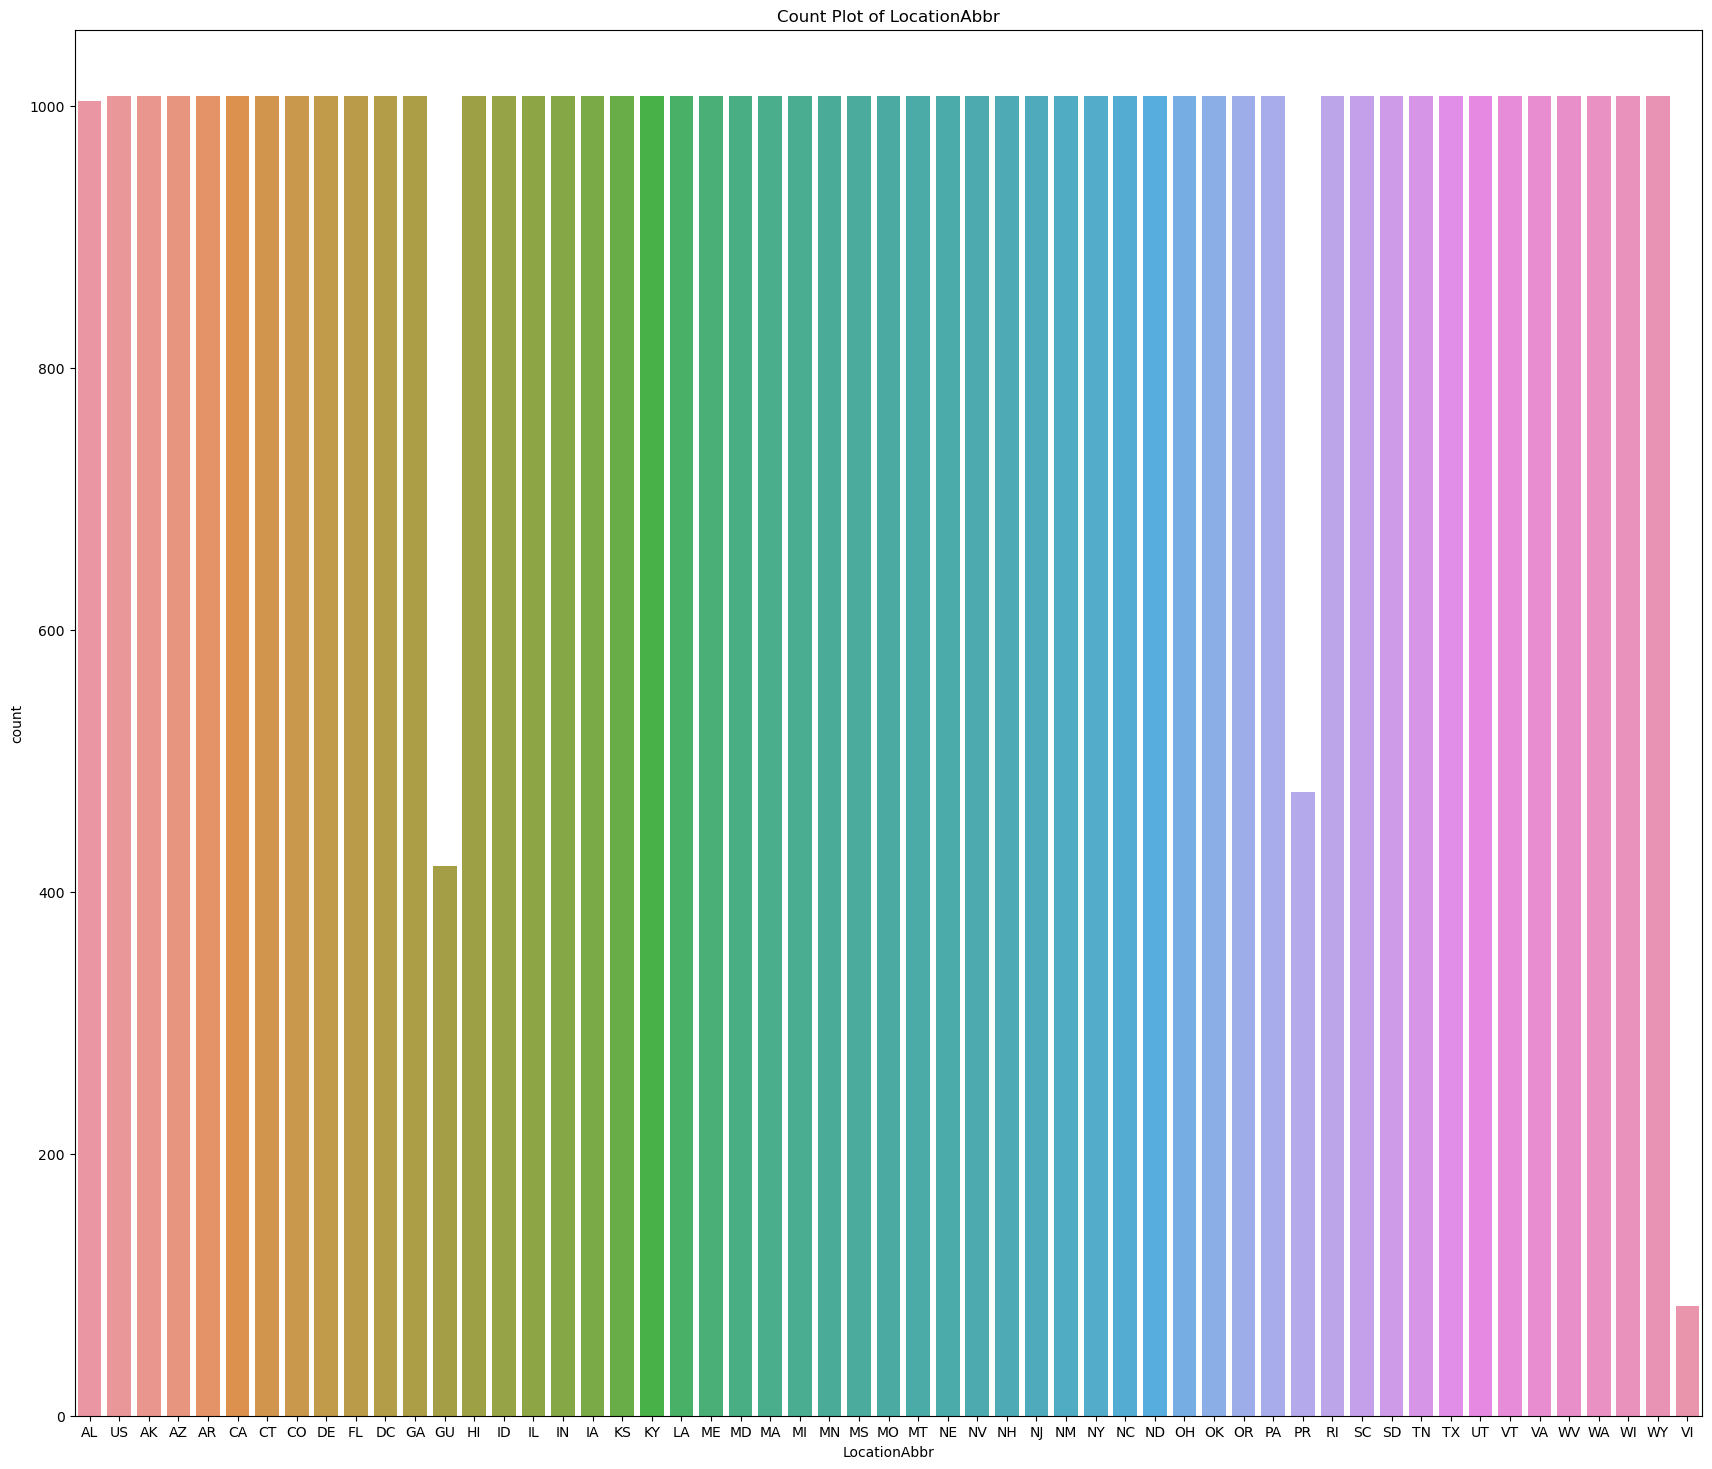

In [14]:
plt.figure(figsize=(21,18))

# Creating a count plot using Seaborn
sns.countplot(data=new_data, x="LocationAbbr")

# Adding title
plt.title('Count Plot of LocationAbbr')

# Display the plot
plt.show()


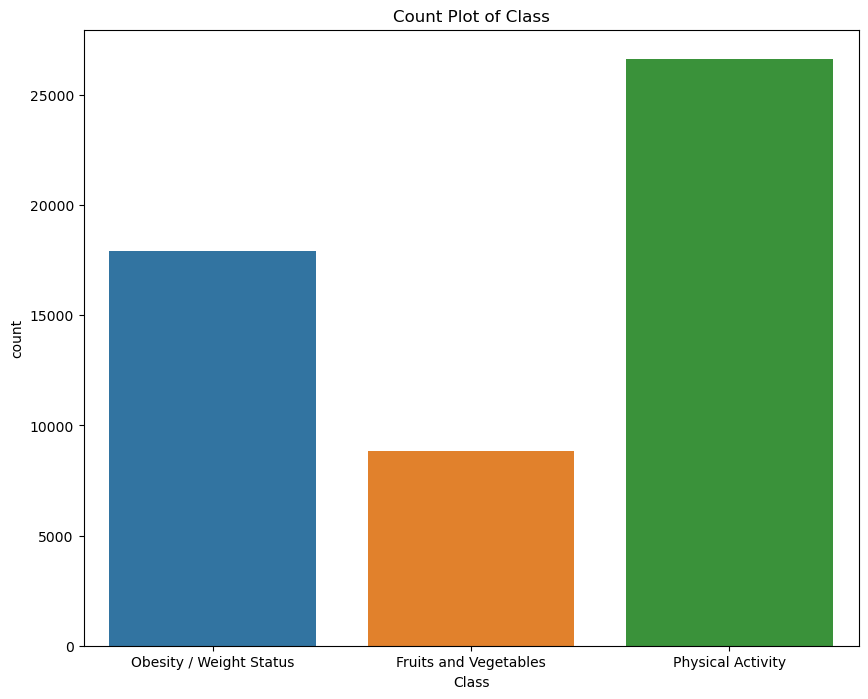

In [15]:
plt.figure(figsize=(10,8))

sns.countplot(data=new_data, x="Class")
plt.title('Count Plot of Class')
plt.show()

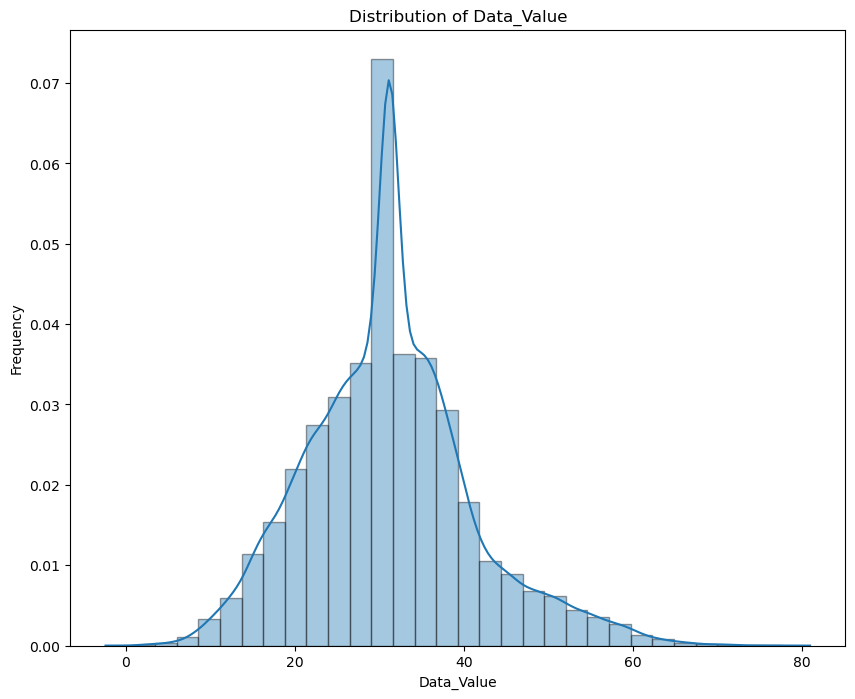

In [16]:
plt.figure(figsize=(10,8))

sns.distplot(new_data['Data_Value'], kde=True, bins=30,  hist_kws={'edgecolor': 'black'})

# Adding title and labels
plt.title("Distribution of Data_Value")
plt.xlabel("Data_Value")
plt.ylabel("Frequency")
plt.show()

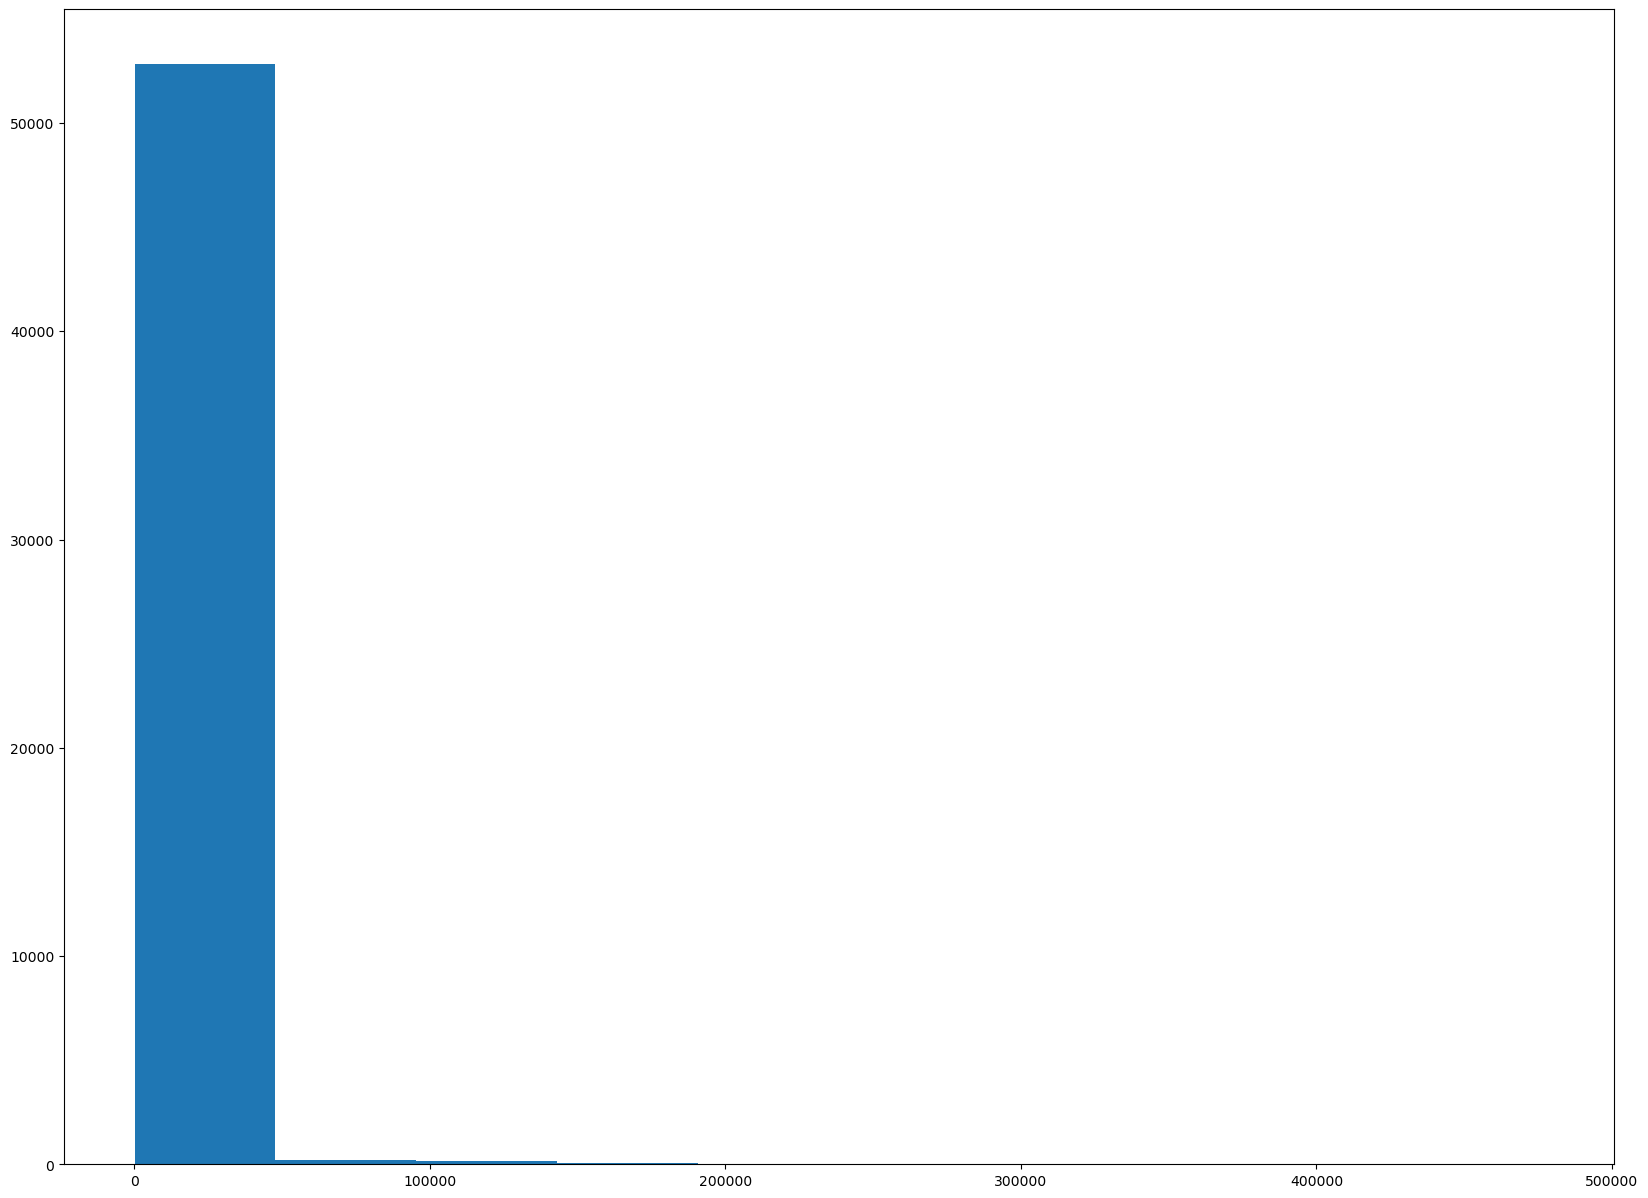

In [17]:
new_data['Sample_Size'].hist(figsize=(20,15), grid=False)
plt.show()


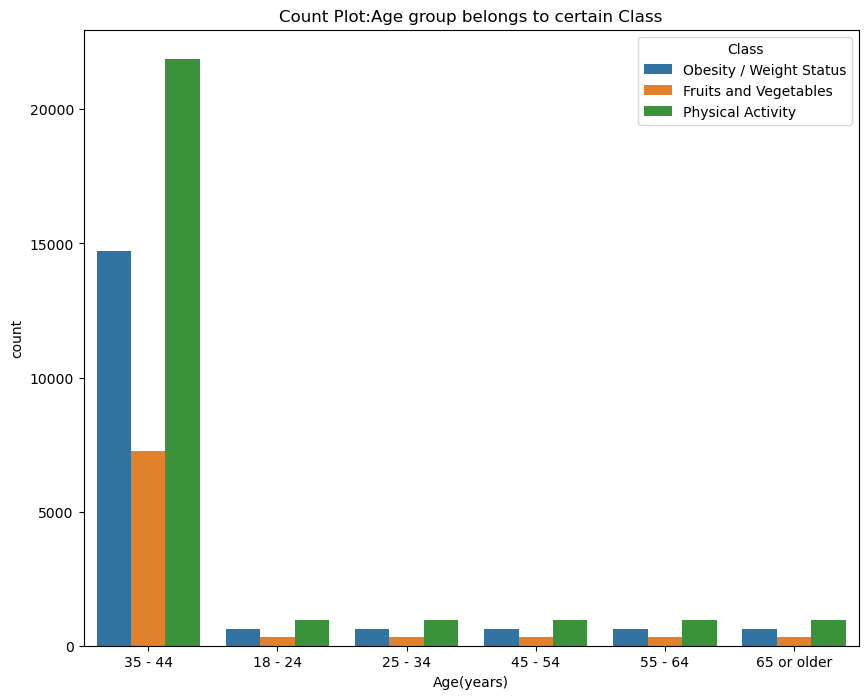

In [18]:
#distinguishing two different features using hue that are interrelated

plt.figure(figsize=(10, 8))
sns.countplot(x='Age(years)', hue='Class', data=new_data)
plt.title('Count Plot:Age group belongs to certain Class')
plt.show()

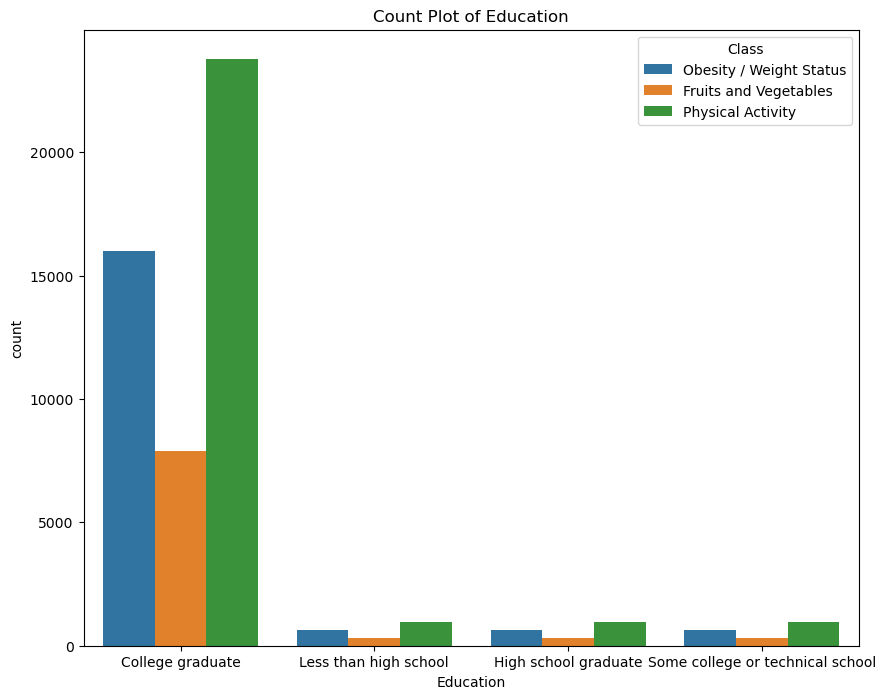

In [19]:
plt.figure(figsize=(10,8))
sns.countplot(data=new_data, x="Education", hue='Class')
plt.title('Count Plot of Education')
plt.show()

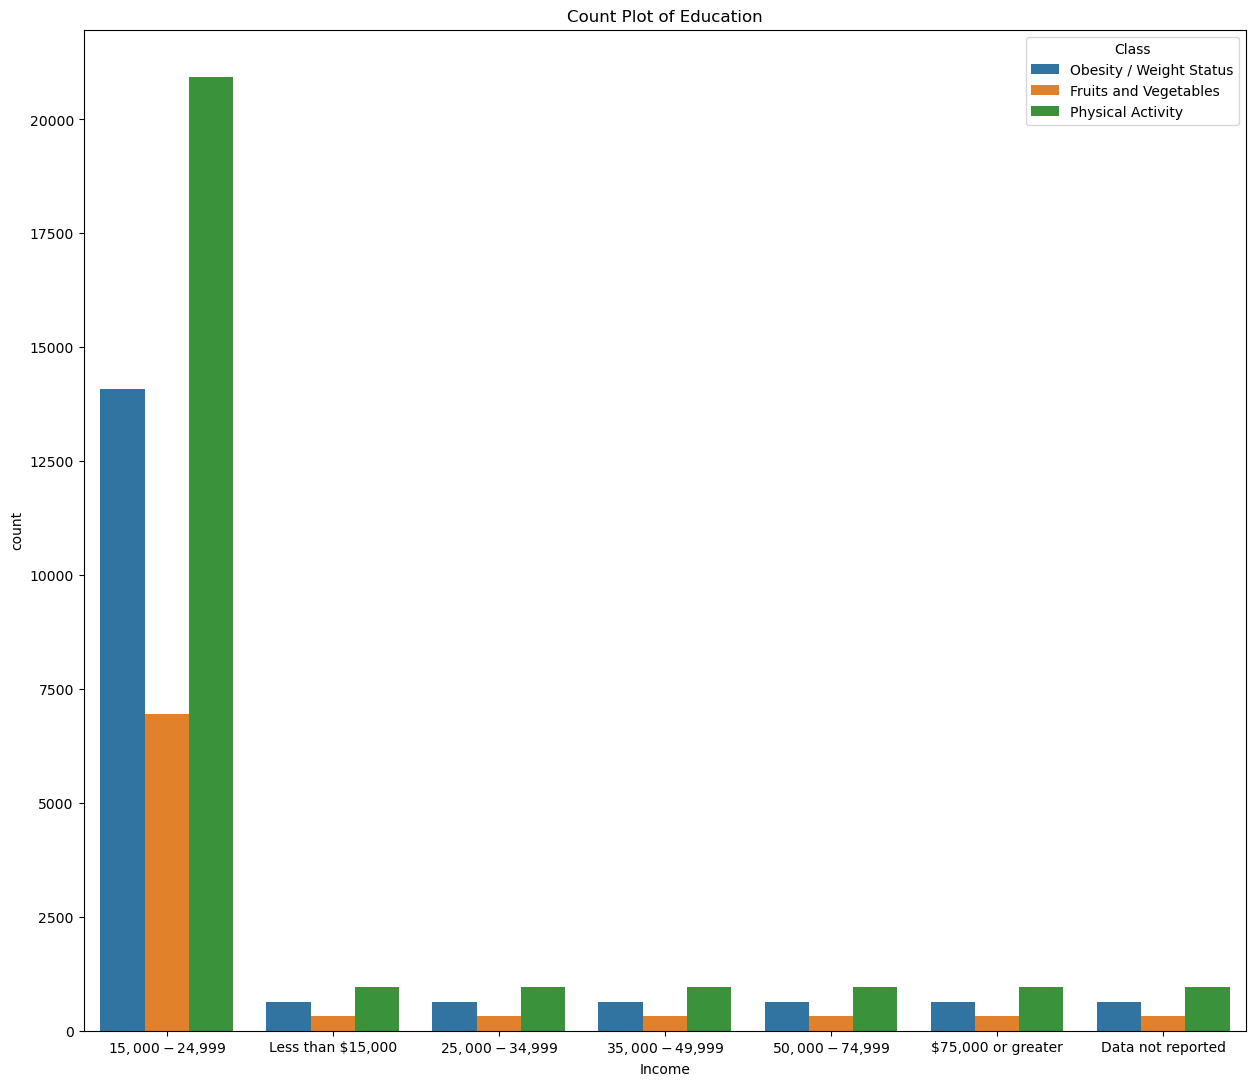

In [20]:
plt.figure(figsize=(15,13))
sns.countplot(data=new_data, x="Income", hue='Class')
plt.title('Count Plot of Education')
plt.show()

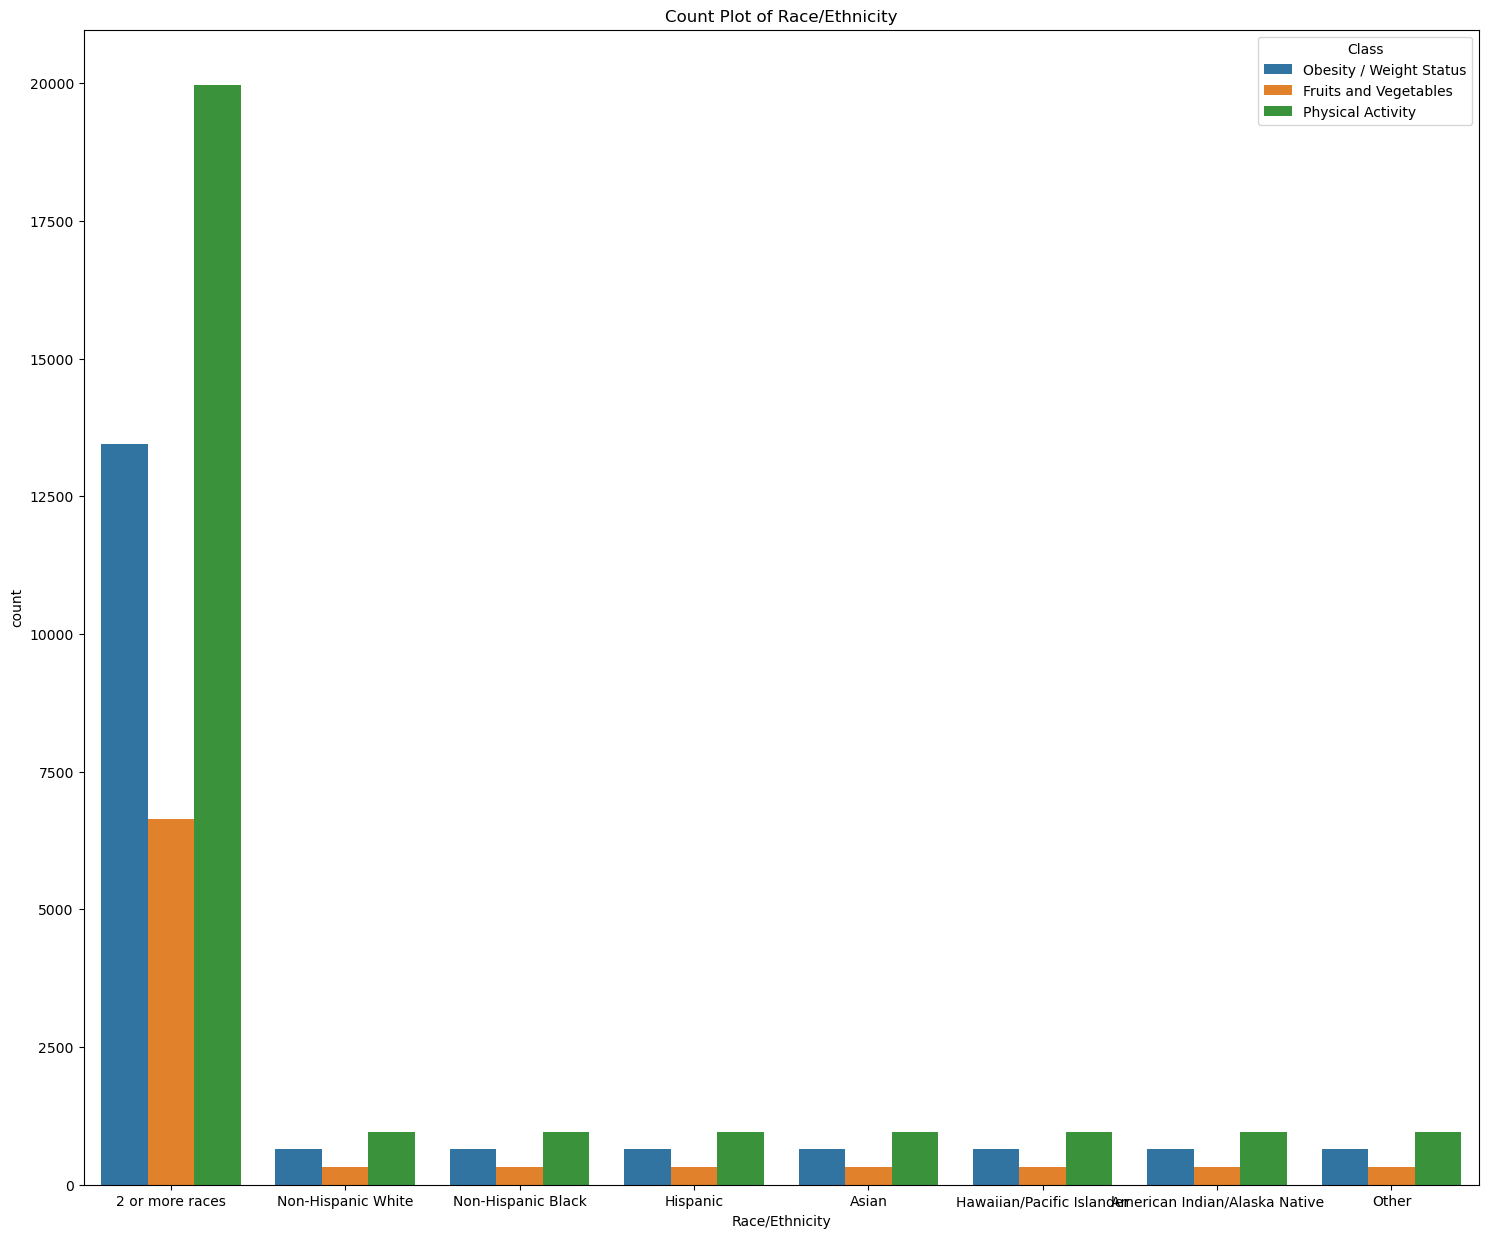

In [21]:
plt.figure(figsize=(18,15))
sns.countplot(data=new_data, x="Race/Ethnicity", hue='Class')
plt.title('Count Plot of Race/Ethnicity')
plt.show()

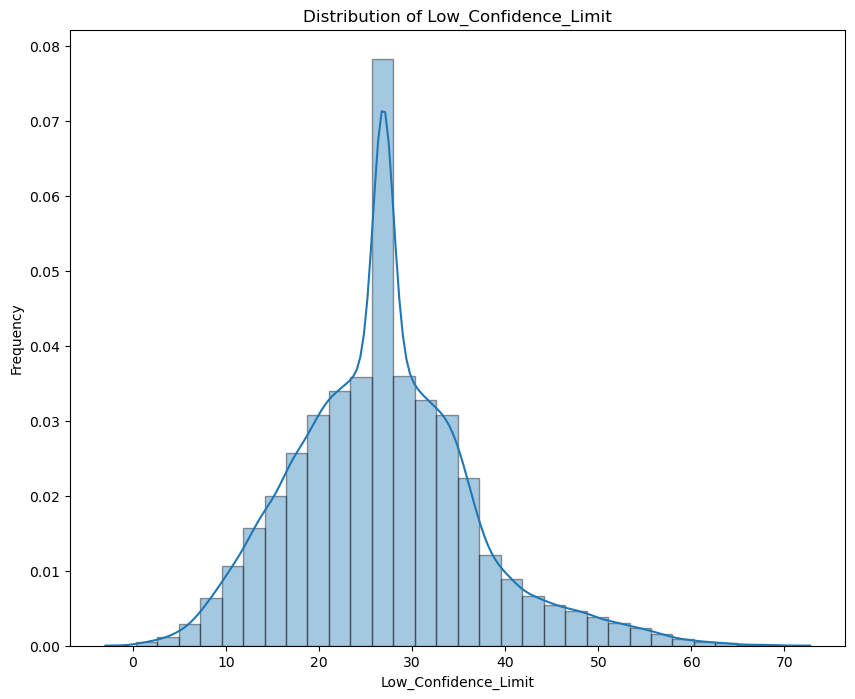

In [22]:
plt.figure(figsize=(10,8))

sns.distplot(new_data['Low_Confidence_Limit'], kde=True, bins=30,  hist_kws={'edgecolor': 'black'})

# Adding title and labels
plt.title("Distribution of Low_Confidence_Limit")
plt.xlabel("Low_Confidence_Limit")
plt.ylabel("Frequency")
plt.show()

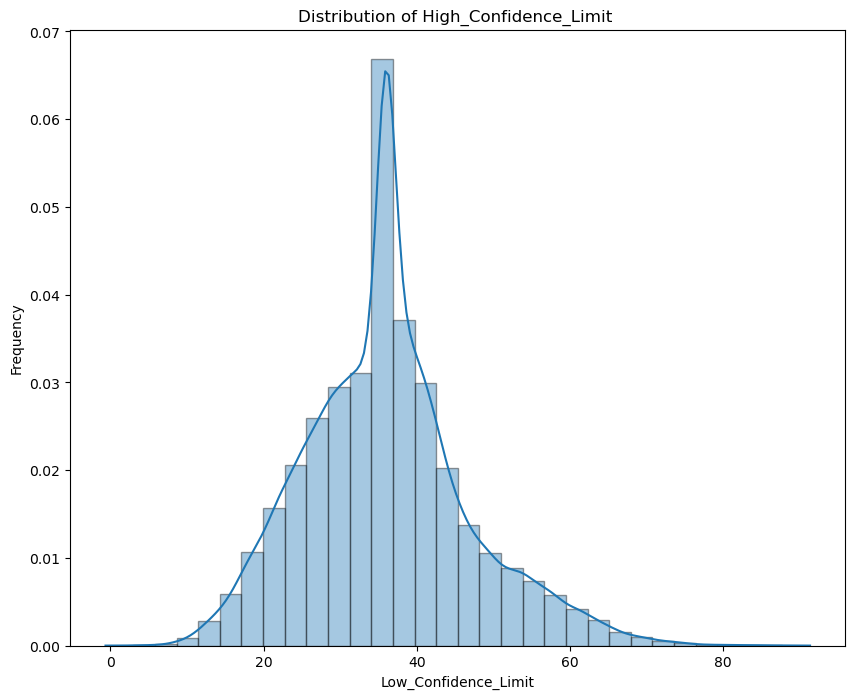

In [23]:
plt.figure(figsize=(10,8))

sns.distplot(new_data['High_Confidence_Limit '], kde=True, bins=30,  hist_kws={'edgecolor': 'black'})

# Adding title and labels
plt.title("Distribution of High_Confidence_Limit ")
plt.xlabel("Low_Confidence_Limit")
plt.ylabel("Frequency")
plt.show()

In [24]:
categorical_col= new_data[['LocationAbbr','Class','Topic','Question','Education','Gender','Race/Ethnicity','ClassID','QuestionID','StratificationID1']]
categorical_col

,LocationAbbr,Class,Topic,Question,Education,Gender,Race/Ethnicity,ClassID,QuestionID,StratificationID1
0,AL,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,College graduate,Female,2 or more races,OWS,Q036,OVERALL
1,AL,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,College graduate,Male,2 or more races,OWS,Q036,MALE
2,AL,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,College graduate,Female,2 or more races,OWS,Q036,FEMALE
3,AL,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Less than high school,Female,2 or more races,OWS,Q036,EDUHS
4,AL,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,High school graduate,Female,2 or more races,OWS,Q036,EDUHSGRAD
...,...,...,...,...,...,...,...,...,...,...
53387,VI,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,College graduate,Female,Asian,PA,Q047,RACEASN
53388,VI,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,College graduate,Female,Hawaiian/Pacific Islander,PA,Q047,RACEHPI
53389,VI,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,College graduate,Female,American Indian/Alaska Native,PA,Q047,RACENAA
53390,VI,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,College graduate,Female,2 or more races,PA,Q047,RACE2PLUS


In [27]:
numerical_col= new_data[['Low_Confidence_Limit','High_Confidence_Limit ','Sample_Size','GeoLocation','Data_Value']]
numerical_col.sample(n=15,replace=False)

,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,GeoLocation,Data_Value
41131,19.600000,24.500000,4443.00000,"(39.29058096400047, -76.60926011099963)",22.000000
16117,38.700000,52.400000,534.00000,"(46.35564873600049, -94.79420050299967)",45.500000
7883,42.800000,49.100000,2046.00000,"(21.304850435000446, -157.85774940299973)",46.000000
13810,5.000000,14.400000,222.00000,"(39.29058096400047, -76.60926011099963)",8.600000
13589,22.800000,27.600000,2645.00000,"(39.29058096400047, -76.60926011099963)",25.100000
44655,42.800000,50.900000,1004.00000,"(37.54268067400045, -78.45789046299967)",46.800000
26211,26.892227,35.989997,3889.19286,"(44.56744942400047, -120.15503132599969)",31.156681
51731,28.500000,38.200000,656.00000,"(44.39319117400049, -89.81637074199966)",33.200000
43139,40.500000,63.900000,139.00000,"(40.06021014100048, -82.40426005599966)",52.300000
37647,16.800000,21.400000,3238.00000,"(31.827240407000488, -99.42677020599967)",19.000000


In [28]:
from sklearn.preprocessing import OrdinalEncoder
oe= OrdinalEncoder()

In [29]:
catcol=categorical_col.select_dtypes(object).columns
catcol

Index(['LocationAbbr', 'Class', 'Topic', 'Question', 'Education', 'Gender',
       'Race/Ethnicity', 'ClassID', 'QuestionID', 'StratificationID1'],
      dtype='object')

In [30]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53392 entries, 0 to 53391
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   LocationAbbr            53392 non-null  object 
 1   Class                   53392 non-null  object 
 2   Topic                   53392 non-null  object 
 3   Question                53392 non-null  object 
 4   Data_Value              53392 non-null  float64
 5   Low_Confidence_Limit    53392 non-null  float64
 6   High_Confidence_Limit   53392 non-null  float64
 7   Sample_Size             53392 non-null  float64
 8   Age(years)              53392 non-null  object 
 9   Education               53392 non-null  object 
 10  Gender                  53392 non-null  object 
 11  Income                  53392 non-null  object 
 12  Race/Ethnicity          53392 non-null  object 
 13  GeoLocation             53392 non-null  object 
 14  ClassID                 53392 non-null

In [31]:
categorical_col[catcol]= oe.fit_transform(categorical_col[catcol])
categorical_col[catcol]

,LocationAbbr,Class,Topic,Question,Education,Gender,Race/Ethnicity,ClassID,QuestionID,StratificationID1
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0,19.0
1,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,2.0,18.0
2,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0,10.0
3,1.0,1.0,1.0,1.0,2.0,0.0,0.0,1.0,2.0,8.0
4,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,9.0
...,...,...,...,...,...,...,...,...,...,...
53387,49.0,2.0,2.0,6.0,0.0,0.0,2.0,2.0,8.0,21.0
53388,49.0,2.0,2.0,6.0,0.0,0.0,3.0,2.0,8.0,24.0
53389,49.0,2.0,2.0,6.0,0.0,0.0,1.0,2.0,8.0,25.0
53390,49.0,2.0,2.0,6.0,0.0,0.0,0.0,2.0,8.0,20.0


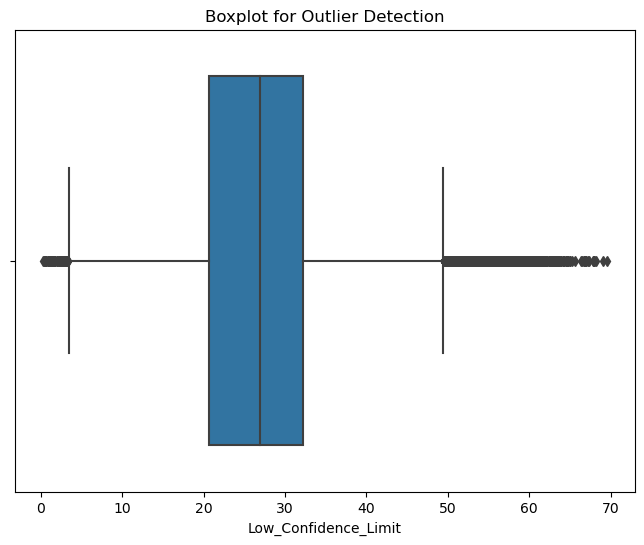

In [32]:
#Outlier check
plt.figure(figsize=(8, 6))
sns.boxplot(x=numerical_col['Low_Confidence_Limit'])
plt.title('Boxplot for Outlier Detection')
plt.show()

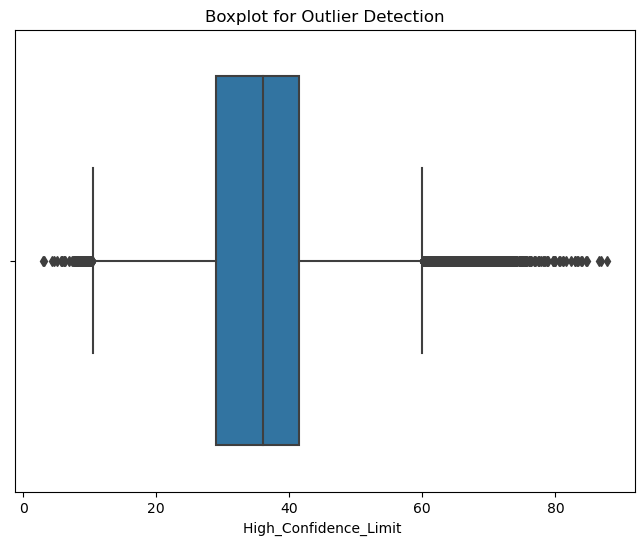

In [33]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=numerical_col['High_Confidence_Limit '])
plt.title('Boxplot for Outlier Detection')
plt.show() 

In [127]:
#importing necessary libraries for splitting the data and fitting the model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import classification_report

In [35]:
categorical_col

,LocationAbbr,Class,Topic,Question,Education,Gender,Race/Ethnicity,ClassID,QuestionID,StratificationID1
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0,19.0
1,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,2.0,18.0
2,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0,10.0
3,1.0,1.0,1.0,1.0,2.0,0.0,0.0,1.0,2.0,8.0
4,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,9.0
...,...,...,...,...,...,...,...,...,...,...
53387,49.0,2.0,2.0,6.0,0.0,0.0,2.0,2.0,8.0,21.0
53388,49.0,2.0,2.0,6.0,0.0,0.0,3.0,2.0,8.0,24.0
53389,49.0,2.0,2.0,6.0,0.0,0.0,1.0,2.0,8.0,25.0
53390,49.0,2.0,2.0,6.0,0.0,0.0,0.0,2.0,8.0,20.0


In [36]:
numerical_col

,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,GeoLocation,Data_Value
0,30.500000,33.500000,7304.00000,"(32.84057112200048, -86.63186076199969)",32.000000
1,29.900000,34.700000,2581.00000,"(32.84057112200048, -86.63186076199969)",32.300000
2,30.000000,33.600000,4723.00000,"(32.84057112200048, -86.63186076199969)",31.800000
3,29.900000,37.600000,1153.00000,"(32.84057112200048, -86.63186076199969)",33.600000
4,30.200000,35.600000,2402.00000,"(32.84057112200048, -86.63186076199969)",32.800000
...,...,...,...,...,...
53387,26.892227,35.989997,3889.19286,"(18.335765, -64.896335)",31.156681
53388,26.892227,35.989997,3889.19286,"(18.335765, -64.896335)",31.156681
53389,26.892227,35.989997,3889.19286,"(18.335765, -64.896335)",31.156681
53390,26.892227,35.989997,3889.19286,"(18.335765, -64.896335)",31.156681


In [37]:
numerical_col.drop('GeoLocation',axis=1,inplace=True)

In [38]:
numerical_col

,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Data_Value
0,30.500000,33.500000,7304.00000,32.000000
1,29.900000,34.700000,2581.00000,32.300000
2,30.000000,33.600000,4723.00000,31.800000
3,29.900000,37.600000,1153.00000,33.600000
4,30.200000,35.600000,2402.00000,32.800000
...,...,...,...,...
53387,26.892227,35.989997,3889.19286,31.156681
53388,26.892227,35.989997,3889.19286,31.156681
53389,26.892227,35.989997,3889.19286,31.156681
53390,26.892227,35.989997,3889.19286,31.156681


In [39]:
#concatenating both the dataframes(i.e numerical_col,categorical_col)
new_data = pd.concat([numerical_col, categorical_col], axis=1)
new_data

,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Data_Value,LocationAbbr,Class,Topic,Question,Education,Gender,Race/Ethnicity,ClassID,QuestionID,StratificationID1
0,30.500000,33.500000,7304.00000,32.000000,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0,19.0
1,29.900000,34.700000,2581.00000,32.300000,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,2.0,18.0
2,30.000000,33.600000,4723.00000,31.800000,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0,10.0
3,29.900000,37.600000,1153.00000,33.600000,1.0,1.0,1.0,1.0,2.0,0.0,0.0,1.0,2.0,8.0
4,30.200000,35.600000,2402.00000,32.800000,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53387,26.892227,35.989997,3889.19286,31.156681,49.0,2.0,2.0,6.0,0.0,0.0,2.0,2.0,8.0,21.0
53388,26.892227,35.989997,3889.19286,31.156681,49.0,2.0,2.0,6.0,0.0,0.0,3.0,2.0,8.0,24.0
53389,26.892227,35.989997,3889.19286,31.156681,49.0,2.0,2.0,6.0,0.0,0.0,1.0,2.0,8.0,25.0
53390,26.892227,35.989997,3889.19286,31.156681,49.0,2.0,2.0,6.0,0.0,0.0,0.0,2.0,8.0,20.0


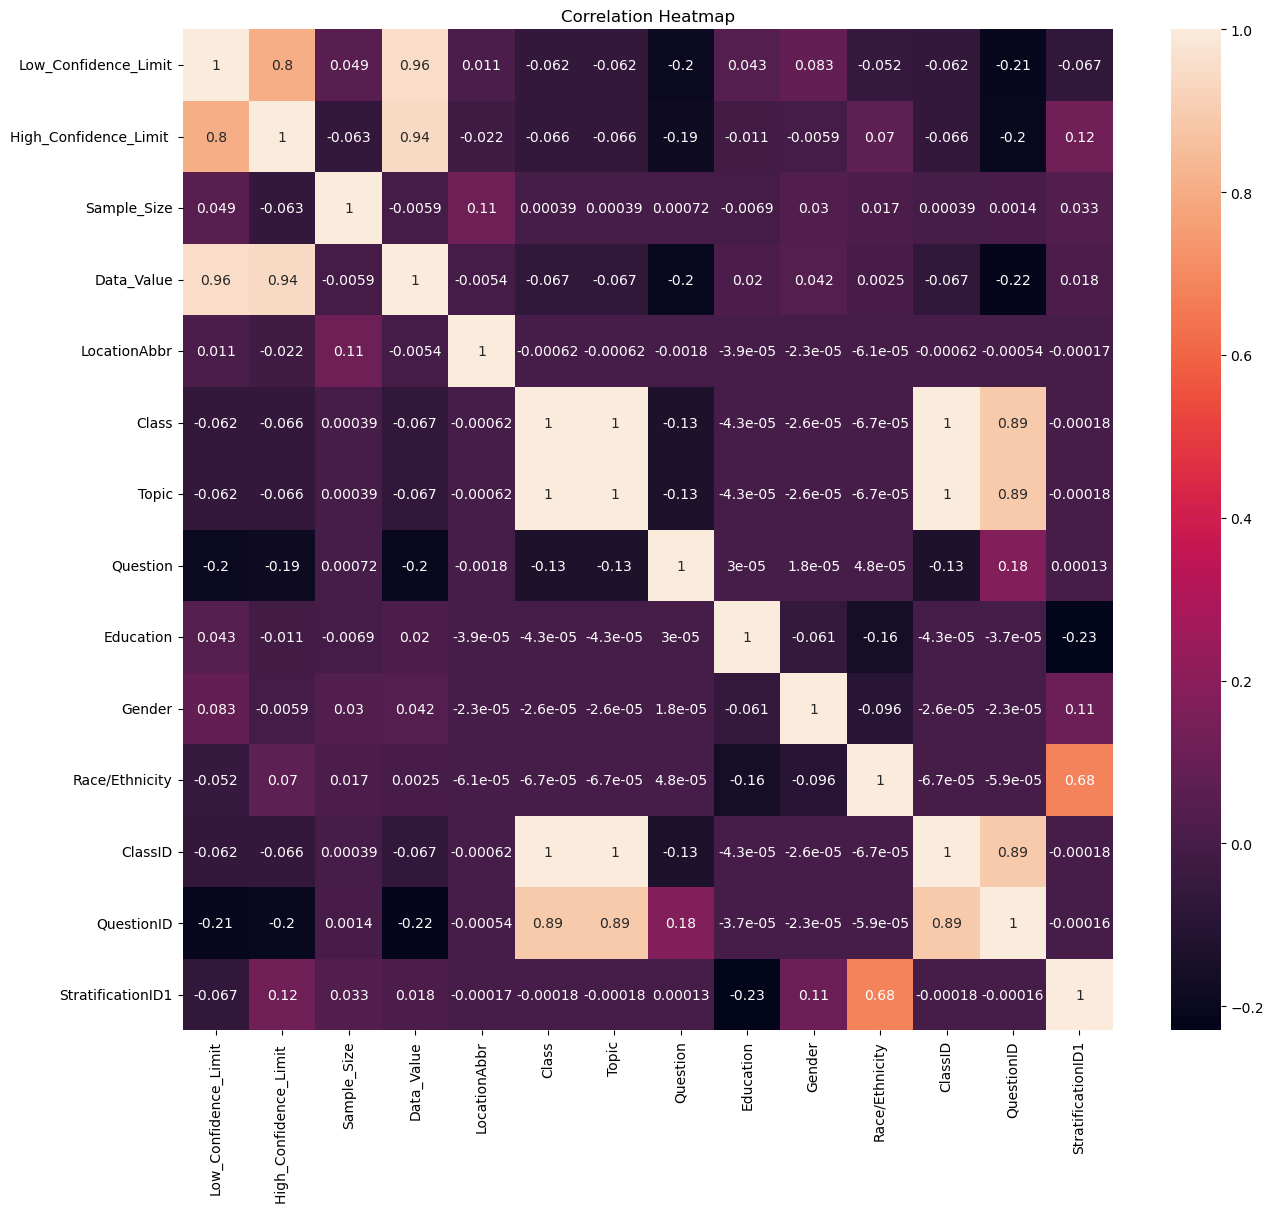

In [138]:
plt.figure(figsize=(15,13))
sns.heatmap(new_data.corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [89]:
#spilt the data X and Y
X = new_data.iloc[:, [0, 1, 2] + list(range(4, new_data.shape[1]))]
Y = new_data['Data_Value']

In [90]:
X

,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,LocationAbbr,Class,Topic,Question,Education,Gender,Race/Ethnicity,ClassID,QuestionID,StratificationID1
0,30.500000,33.500000,7304.00000,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0,19.0
1,29.900000,34.700000,2581.00000,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,2.0,18.0
2,30.000000,33.600000,4723.00000,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0,10.0
3,29.900000,37.600000,1153.00000,1.0,1.0,1.0,1.0,2.0,0.0,0.0,1.0,2.0,8.0
4,30.200000,35.600000,2402.00000,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53387,26.892227,35.989997,3889.19286,49.0,2.0,2.0,6.0,0.0,0.0,2.0,2.0,8.0,21.0
53388,26.892227,35.989997,3889.19286,49.0,2.0,2.0,6.0,0.0,0.0,3.0,2.0,8.0,24.0
53389,26.892227,35.989997,3889.19286,49.0,2.0,2.0,6.0,0.0,0.0,1.0,2.0,8.0,25.0
53390,26.892227,35.989997,3889.19286,49.0,2.0,2.0,6.0,0.0,0.0,0.0,2.0,8.0,20.0


In [91]:
Y

0        32.000000
1        32.300000
2        31.800000
3        33.600000
4        32.800000
           ...    
53387    31.156681
53388    31.156681
53389    31.156681
53390    31.156681
53391    31.156681
Name: Data_Value, Length: 53392, dtype: float64

## Train_Test_Split

In [93]:
#using train_test_split to divide the training and testing data
X_train,X_test,y_train,y_test= train_test_split(X,Y,test_size= 0.25, random_state=0)

## Fit the model

In [128]:
#Fitting the model
linreg=LinearRegression()
linreg.fit(X_train,y_train)
y_pred= linreg.predict(X_test)

## Model Evaluation

In [130]:
#Model evaluation
MAE= mae(y_test,y_pred)
MSE= mse(y_test,y_pred)
RMSE= np.sqrt(MSE)
R2= r2_score(y_test,y_pred)

In [131]:
print('MAE', MAE)
print('MSE', MSE)
print('RMSE', RMSE)
print('R2_Score', R2)

MAE 0.17311729770846504
MSE 0.12163221444165372
RMSE 0.3487581030480205
R2_Score 0.9987255442669639
